# Sampling and Hypothesis Testing

In [255]:
#Libraries
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
from sklearn import preprocessing
from scipy.stats import ttest_1samp
from mlxtend.preprocessing import minmax_scaling
import os
import statistics as sts

# Visa Shopping

Visa shopping: It is where someone would apply in a specific consulate in order to have higher odds of getting the visa or getting a higher tier visa in general. The idea itself seemed to have a lot of rumours around it and the only way to consider it a myth/reality is by doing proper analysis over real data. Luckily, the data is here.

# Your job is to appropriately sample and run hypothesis testing to prove/disprove whether Visa-shopping is real. 

We are trying to figure out the best consulates to apply for to have the highest odds for receiving a uniform visa in general, or a multiple entry visa (MEV) in particular.

In [256]:
df = pd.read_csv("2018-data-for-consulates.csv")
df.head()

,Schengen State,Country where consulate is located,Consulate,Airport transit visas (ATVs) applied for,ATVs issued (including multiple),Multiple ATVs issued,ATVs not issued,Not issued rate for ATVs,Uniform visas applied for,Total uniform visas issued (including MEV),Multiple entry uniform visas (MEVs) issued,Share of MEVs on total number of uniform visas issued,Total LTVs issued,Uniform visas not issued,Not issued rate for uniform visas,Total ATVs and uniform visas applied for,"Total ATVs and uniform visas issued (including multiple ATVs, MEVs and LTVs)",Total ATVs and uniform visas not issued,Not issued rate for ATVs and uniform visas
0,Austria,ALBANIA,TIRANA,NaN,NaN,NaN,NaN,NaN,62,32,10,31.3%,21,9,14.5%,62,53,9,14.5%
1,Austria,ALGERIA,ALGIERS,NaN,NaN,NaN,NaN,NaN,2481,1658,1461,88.1%,1,822,33.1%,"2,481","1,659",822,33.1%
2,Austria,ARGENTINA,BUENOS AIRES,NaN,NaN,NaN,NaN,NaN,16,16,16,100.0%,NaN,NaN,NaN,16,16,NaN,NaN
3,Austria,AUSTRALIA,CANBERRA,NaN,NaN,NaN,NaN,NaN,2776,2653,989,37.3%,1,122,4.4%,"2,776","2,654",122,4.4%
4,Austria,AZERBAIJAN,BAKU,1,1,1,NaN,NaN,1976,1895,1769,93.4%,2,79,4.0%,"1,977","1,898",79,4.0%


# Data Cleaning: 


It is a good technique to strip column names of trailing white spaces and "\n" characters. Do that in the cell provided below.
- Rename columns with white spaces for e.g. "Schengen State': 'sch_state'"
- Look into df.strip()

In [257]:
# Code here
df.columns=['sch_state',
              'country_consulate', 
                    'Consulate',
                      'ATV_applied',
                       'ATV_issued',
                        'Multiple_ATV_issued',
                        'ATV_notissued',
                       'Not_issuedrate',
                       'Visas_applied',
                       'Total_univisasIssued',
                       'MEV_issued',
                      'Share_MEV_issued',
                      'Total_LTV_issued',
                      'Uni_Visas_notissued' ,
                      'Uniform_Notissued_rate',
                      'Total_ATV_Visas_Applied',
                      'Total_ATV_Visas_Issued',
                      'Total_ATV_Visas_notIssued',
                      'NotIssued_rate' ] 
df

,sch_state,country_consulate,Consulate,ATV_applied,ATV_issued,Multiple_ATV_issued,ATV_notissued,Not_issuedrate,Visas_applied,Total_univisasIssued,MEV_issued,Share_MEV_issued,Total_LTV_issued,Uni_Visas_notissued,Uniform_Notissued_rate,Total_ATV_Visas_Applied,Total_ATV_Visas_Issued,Total_ATV_Visas_notIssued,NotIssued_rate
0,Austria,ALBANIA,TIRANA,NaN,NaN,NaN,NaN,NaN,62,32,10,31.3%,21,9,14.5%,62,53,9,14.5%
1,Austria,ALGERIA,ALGIERS,NaN,NaN,NaN,NaN,NaN,2481,1658,1461,88.1%,1,822,33.1%,"2,481","1,659",822,33.1%
2,Austria,ARGENTINA,BUENOS AIRES,NaN,NaN,NaN,NaN,NaN,16,16,16,100.0%,NaN,NaN,NaN,16,16,NaN,NaN
3,Austria,AUSTRALIA,CANBERRA,NaN,NaN,NaN,NaN,NaN,2776,2653,989,37.3%,1,122,4.4%,"2,776","2,654",122,4.4%
4,Austria,AZERBAIJAN,BAKU,1,1,1,NaN,NaN,1976,1895,1769,93.4%,2,79,4.0%,"1,977","1,898",79,4.0%
5,Austria,BOSNIA AND HERZEGOVINA,SARAJEVO,NaN,NaN,NaN,NaN,NaN,616,615,615,100.0%,NaN,1,0.2%,616,615,1,0.2%
6,Austria,BRAZIL,BRASILIA,NaN,NaN,NaN,NaN,NaN,37,37,36,97.3%,NaN,NaN,NaN,37,37,NaN,NaN
7,Austria,BULGARIA,SOFIA,NaN,NaN,NaN,NaN,NaN,217,199,162,81.4%,13,5,2.3%,217,212,5,2.3%
8,Austria,CANADA,OTTAWA,NaN,NaN,NaN,NaN,NaN,686,659,107,16.2%,1,26,3.8%,686,660,26,3.8%
9,Austria,CHILE,SANTIAGO DE CHILE,NaN,NaN,NaN,NaN,NaN,22,22,17,77.3%,NaN,NaN,NaN,22,22,NaN,NaN


We are not interested in Airport Transit Visas (ATV). Drop all the columns involving ATVs for e.g. Multiple ATVs issued, ATVs not issued,

In [258]:
del df['ATV_applied']
del df['ATV_issued']
del df['Multiple_ATV_issued']
del df['ATV_notissued']
del df['Not_issuedrate']



# Missing Values

- Drop the rows where Schengen State is missing.
- Replace other missing values with zero.
- Print the summary for missing values after cleaning.

In [259]:
# df.isnull().sum()
df = df[df['sch_state'].notnull()]


In [260]:
# Code here
df = df.fillna(0)
df

,sch_state,country_consulate,Consulate,Visas_applied,Total_univisasIssued,MEV_issued,Share_MEV_issued,Total_LTV_issued,Uni_Visas_notissued,Uniform_Notissued_rate,Total_ATV_Visas_Applied,Total_ATV_Visas_Issued,Total_ATV_Visas_notIssued,NotIssued_rate
0,Austria,ALBANIA,TIRANA,62,32,10,31.3%,21,9,14.5%,62,53,9,14.5%
1,Austria,ALGERIA,ALGIERS,2481,1658,1461,88.1%,1,822,33.1%,"2,481","1,659",822,33.1%
2,Austria,ARGENTINA,BUENOS AIRES,16,16,16,100.0%,0,0,0,16,16,0,0
3,Austria,AUSTRALIA,CANBERRA,2776,2653,989,37.3%,1,122,4.4%,"2,776","2,654",122,4.4%
4,Austria,AZERBAIJAN,BAKU,1976,1895,1769,93.4%,2,79,4.0%,"1,977","1,898",79,4.0%
5,Austria,BOSNIA AND HERZEGOVINA,SARAJEVO,616,615,615,100.0%,0,1,0.2%,616,615,1,0.2%
6,Austria,BRAZIL,BRASILIA,37,37,36,97.3%,0,0,0,37,37,0,0
7,Austria,BULGARIA,SOFIA,217,199,162,81.4%,13,5,2.3%,217,212,5,2.3%
8,Austria,CANADA,OTTAWA,686,659,107,16.2%,1,26,3.8%,686,660,26,3.8%
9,Austria,CHILE,SANTIAGO DE CHILE,22,22,17,77.3%,0,0,0,22,22,0,0


In [261]:
#Print Summary again
# df.isnull().sum() 

- Add columns of "decisions" and "rejection_rate"
- Decisions is total number of decisions taken - sum of visas issued, LTV's issued, Rejected
- Rejection rate is what percentage of *decisions* are rejected

In [262]:
#Code here
temp=[]
temp2=[]
visas= df['Total_univisasIssued']
ltv= df['Total_LTV_issued']
rej= df['Uni_Visas_notissued']

for v,l,r in zip(visas,ltv, rej):
    if "," in str(v):
        v= v.split(",")
        v=v[0] + v[1]
    if "," in str(l):
        l=l.split(",")
        l=l[0]+ l[1]
    if "," in str(r):
        r=r.split(",")
        r=r[0] + r[1]
    ans= float(v) + float(l) + float(r)
    if ans== 0:
        kaf=0
    elif ans>0:
        kaf= ((float(r))/(float(ans)))
    temp.append(ans)
    temp2.append(kaf)
df['decisions']= temp
df['rejection_rate']= temp2
df

,sch_state,country_consulate,Consulate,Visas_applied,Total_univisasIssued,MEV_issued,Share_MEV_issued,Total_LTV_issued,Uni_Visas_notissued,Uniform_Notissued_rate,Total_ATV_Visas_Applied,Total_ATV_Visas_Issued,Total_ATV_Visas_notIssued,NotIssued_rate,decisions,rejection_rate
0,Austria,ALBANIA,TIRANA,62,32,10,31.3%,21,9,14.5%,62,53,9,14.5%,62.0,0.145161
1,Austria,ALGERIA,ALGIERS,2481,1658,1461,88.1%,1,822,33.1%,"2,481","1,659",822,33.1%,2481.0,0.331318
2,Austria,ARGENTINA,BUENOS AIRES,16,16,16,100.0%,0,0,0,16,16,0,0,16.0,0.000000
3,Austria,AUSTRALIA,CANBERRA,2776,2653,989,37.3%,1,122,4.4%,"2,776","2,654",122,4.4%,2776.0,0.043948
4,Austria,AZERBAIJAN,BAKU,1976,1895,1769,93.4%,2,79,4.0%,"1,977","1,898",79,4.0%,1976.0,0.039980
5,Austria,BOSNIA AND HERZEGOVINA,SARAJEVO,616,615,615,100.0%,0,1,0.2%,616,615,1,0.2%,616.0,0.001623
6,Austria,BRAZIL,BRASILIA,37,37,36,97.3%,0,0,0,37,37,0,0,37.0,0.000000
7,Austria,BULGARIA,SOFIA,217,199,162,81.4%,13,5,2.3%,217,212,5,2.3%,217.0,0.023041
8,Austria,CANADA,OTTAWA,686,659,107,16.2%,1,26,3.8%,686,660,26,3.8%,686.0,0.037901
9,Austria,CHILE,SANTIAGO DE CHILE,22,22,17,77.3%,0,0,0,22,22,0,0,22.0,0.000000


In [263]:
# df.head()

# Hypothesis Testing

- We will be picking three countries.
- The three countries are Egypt, India and Japan.
- You need to test whether in there is a better _chance_ of getting a visa if you apply to a particukar consulate within that country or is it by chance.
- Add subheadings for each country

In order to answer this question correctly, we need to define the population and the sample we will use:
1. Population: Total number of applicants/rejects in all the country.
2. Sample: Total number of applicants/rejects in all the targeted consulates.
The null hypothesis, which is a prediction that there is no significant difference between a specific consulate over all other consulates and that these numbers could have happened out naturally due to fluctations in application qualities received.
In order to proceed with this, we need to make a rather **BIG** assumption, that all applications to all consulates have the same *average* quality or that they came from the same pool/population.




*Does this assumption make sense?*

_Write why or why not?_

#### Yes this assumption makes sense because if we do not assume that all the applications are of the same quality then our experiment won't be randomized control experiment. We have to assume that otherwise we have to take in account the quality of every application and how much it effects our experiment which is not possible for such a large population and sample size. 

#### We can't proceed without making this assumption since it is a large factor and we have to take it into account before we do our experiment and tests

#  We can conduct this using univariate T-test.
You will use the scipy package.
This links will help you get started:
    - https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce
    
    
You need to calculate the test statistic and choose an appropriate p-value. Mention why you think this is an appropriate p-value. Once you have the test statistic, you need to sample and test your hypothesis.
    

For each country:
   - Plot a piechart showing the consulates with the highest number of decisions.
   - You will be running your hypothesis tests w.r.t three attributes
       - Rejection rate (if you have a weak visa application)
       - Multi-Entry Visa Share (if you have a strong visa application)
       - Weighted Score: You are required to calculate a normalized engineered feature
           - (1-rejection_rate) * mevs_share
           - Normalize this score
        

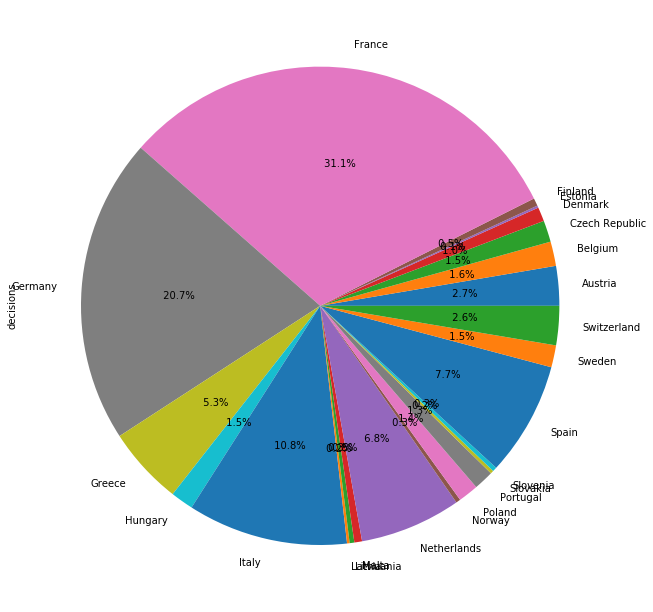

### P value: We set our level of significance to be 5%. We took this value because we are confident that there is a very low risk of concluding that a difference exists between our population mean and sample mean. Taking level of signficance to be 5% mean that there is a 5% risk that there exists a difference. 

In [386]:
mf = df["Share_MEV_issued"].str.replace("%","").astype(float)

df['Weighted_Score']= (1- (df['rejection_rate']))* (mf/100)

weight= df[['Weighted_Score']]

min_max_scaler = preprocessing.MinMaxScaler()


x_scaled = min_max_scaler.fit_transform(weight)


df_normalized = pd.DataFrame(x_scaled)
df['Weighted_Score']= df_normalized






## Rejection Rate:
#### Null Hypthesis (H0): There is no significant difference between the country's rejection rate and a specific consulate.
#### Alternative Hypothesis(H1): There is a significant difference between a chosen specific consulate and country's rejection rate.

You are required to submit an analysis of *EACH* country why you think your hypothesis were rejected/accepted. You can include geo-political factors in your report as well.

#  Egypt

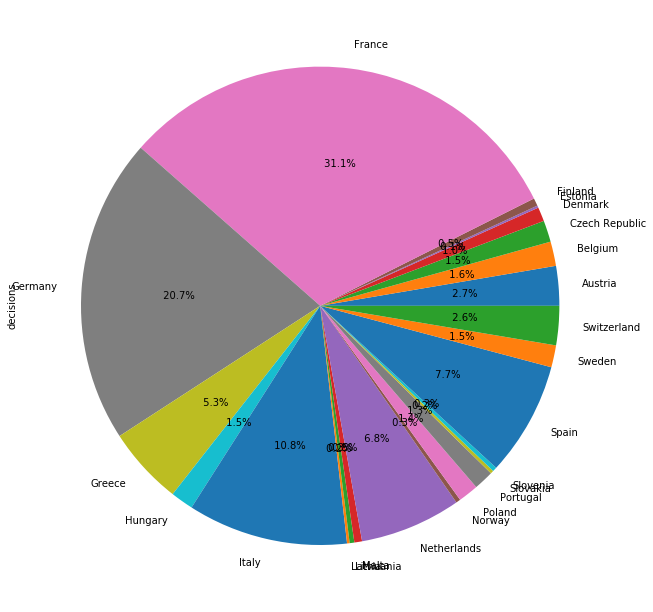

In [404]:
dfn= df[(df['country_consulate']== 'EGYPT')]
ndf= dfn['decisions'].groupby(dfn['sch_state']).sum()
ndf.plot.pie(y='decisions', figsize=(11,11), autopct= ' %.1f%%')

## Rejection Rate:

In [332]:
df["Total_ATV_Visas_Issued"] = df["Total_ATV_Visas_Issued"].astype(str)
df["Total_ATV_Visas_Issued"] = df["Total_ATV_Visas_Issued"].str.replace(",","")
df["Total_ATV_Visas_notIssued"] = df["Total_ATV_Visas_notIssued"].astype(str)

df["Total_ATV_Visas_notIssued"] = df["Total_ATV_Visas_notIssued"].str.replace(",","")



Egypt= df[(df['country_consulate'] == 'EGYPT')]
Egypt




,sch_state,country_consulate,Consulate,Visas_applied,Total_univisasIssued,MEV_issued,Share_MEV_issued,Total_LTV_issued,Uni_Visas_notissued,Uniform_Notissued_rate,Total_ATV_Visas_Applied,Total_ATV_Visas_Issued,Total_ATV_Visas_notIssued,NotIssued_rate,decisions,rejection_rate,Weighted_Score
16,Austria,EGYPT,CAIRO,4993,4132,2872,69.5%,39,822,16.5%,"4,993",4171,822,16.5%,4993.0,0.164630,0.012859
85,Belgium,EGYPT,CAIRO,3250,1946,464,23.8%,15,1111,34.2%,"3,250",1961,1111,34.2%,3072.0,0.361654,0.003336
170,Czech Republic,EGYPT,CAIRO,2713,2015,433,21.5%,3,693,25.5%,"2,713",2018,693,25.5%,2711.0,0.255625,0.003516
243,Denmark,EGYPT,CAIRO,1790,1542,763,49.5%,1,238,13.3%,"1,791",1544,238,13.3%,1781.0,0.133633,0.009488
295,Estonia,EGYPT,CAIRO,279,198,68,34.3%,7,74,26.5%,279,205,74,26.5%,279.0,0.265233,0.005560
321,Finland,EGYPT,CAIRO,985,846,291,34.4%,0,131,13.3%,985,846,131,13.3%,977.0,0.134084,0.006578
426,France,EGYPT,CAIRO,60165,45733,13514,29.5%,341,11941,19.8%,"60,169",46078,11941,19.8%,58015.0,0.205826,0.005166
587,Germany,EGYPT,CAIRO,38535,32848,26496,80.7%,315,5372,13.9%,"38,536",33164,5372,13.9%,38535.0,0.139406,0.015390
738,Greece,EGYPT,ALEXANDRIA,3210,2873,1633,56.8%,0,337,10.5%,"3,210",2873,337,10.5%,3210.0,0.104984,0.011255
739,Greece,EGYPT,CAIRO,6606,5443,1502,27.6%,106,1057,16.0%,"6,606",5549,1057,16.0%,6606.0,0.160006,0.005111


In [333]:
Egypt= df[(df['country_consulate'] == 'EGYPT')]
m0= Egypt['rejection_rate']
r1= Egypt['Total_ATV_Visas_notIssued'].astype(float)
r1= r1.sum(axis = 0, skipna = True) 
r1= float(r1)
d1= Egypt['decisions'].astype(float)
d1=d1.sum(axis = 0, skipna = True) 
m= r1/d1


print("Rejection population mean for whole Egypt:", m, '\n')

for index, row in Egypt.iterrows():
    #print(index, row['sch_state'])
    arr=[]

    #Austria = Egypt[(Egypt['sch_state'] == 'Austria')]
    rej= row['Total_ATV_Visas_notIssued']
    acc= row['Total_ATV_Visas_Issued']
    r=int(rej)
    a= int(acc)


    arr= [1]*r
    arr1= [0]*a

    arr.extend(arr1)
    np.random.shuffle(arr)

    arr= np.asarray(arr)
    tset, pval = ttest_1samp(arr, m)
    
    print(row['sch_state'], ": ")


    if (pval < 0.025):
        print("Test statistic is:", tset ," P value:", pval)
        print("We are rejecting Null Hypothesis i.e. There is a difference between chosen consulate and country's rejection rate")
        print('\n ')
    
    else:
        print("Test statistic is:", tset ," P value:", pval)
        print("We are accepting Null Hypothesis i.e. There is no significant difference between chosen consulate and country's rejection rate")
        print('\n')



Rejection population mean for whole Egypt: 0.2031253350487831 

Austria : 
Test statistic is: -7.334077740998675  P value: 2.591698059521639e-13
We are rejecting Null Hypothesis i.e. There is a difference between chosen consulate and country's rejection rate

 
Belgium : 
Test statistic is: 18.284038422454948  P value: 5.667215810243747e-71
We are rejecting Null Hypothesis i.e. There is a difference between chosen consulate and country's rejection rate

 
Czech Republic : 
Test statistic is: 6.265350962902815  P value: 4.3128355833747246e-10
We are rejecting Null Hypothesis i.e. There is a difference between chosen consulate and country's rejection rate

 
Denmark : 
Test statistic is: -8.63046403301978  P value: 1.3304015082504249e-17
We are rejecting Null Hypothesis i.e. There is a difference between chosen consulate and country's rejection rate

 
Estonia : 
Test statistic is: 2.345734400449404  P value: 0.019692531592620115
We are rejecting Null Hypothesis i.e. There is a differenc

### Report (Rejection Rate):
- Rejection rate basically is the ratio of the rejected uniform visas and sum of uniform visas issued , LTV issued, and rejected uniform visas. Rejection rate explains if you apply for a uniform visa what are the chances your application will get rejected irrespective of any factor. We are not taking any other factor into account here. We applied t test to all the consulates in the country.

- Whole Country's rejection rate turned out to be 20.3%, for only 3 countries( France, Slovenia, Latvia)  we accepted the null hypothesis that there is actually no difference between country's rejection rate and the specific consulate's. However, for all the other countries we accepted the alternative hypothesis that there is actually a significant difference between the population mean and sample mean. 

- This explains that since most countries rejected the null hypothesis , we can say that choosing a specific consulate over other actually changes your chances of getting rejected. For example if you randomly choose a country your chances of getting rejected are 20.3%, however, if you go to Switerzerland's consulate you will have a better chance of acceptance since its rejection rate is 14% , so you improved your chances just by the dataset.

- However we are not taking any other factors into account, we are assuming that all applications are more or less of the same quality so our results might be biased. Other factors we are not taking into account are the geo political factors. For e.g. if the consulate country has good political relationship with our chosen country then there might be better chances or maybe if it is in European Union even then there can be an effect on rejection rate.



In [334]:
df["MEV_issued"] = df["MEV_issued"].astype(str)

df["MEV_issued"] = df["MEV_issued"].str.replace(",","")

df["Total_univisasIssued"] = df["Total_univisasIssued"].astype(str)

df["Total_univisasIssued"] = df["Total_univisasIssued"].str.replace(",","")


### Multi- Entry Visa Share
#### Null Hypthesis (H0): There is no significant difference between the country's MEV share and a specific consulate.
#### Alternative Hypothesis(H1): There is a significant difference between a chosen specific consulate and country's MEV share.

In [335]:
Egypt= df[(df['country_consulate'] == 'EGYPT')]
Egypt["Share_MEV_issued"] = Egypt["Share_MEV_issued"].str.replace("%","").astype(float)
m0= Egypt['Share_MEV_issued']

m= sts.mean(m0)
m=m/100

print("Mean population for Multi Entry Visa Share:" , m, '\n')
for index, row in Egypt.iterrows():
    #print(index, row['sch_state'])
    arr=[]

    Mev= row['MEV_issued']
    tot= row['Total_univisasIssued']

    mev= int(Mev)
    t= int(tot)
    t= t- mev

    arr= [1]*mev
    arr1= [0]* t

    arr.extend(arr1)
    np.random.shuffle(arr)

    arr= np.asarray(arr)
    
    z= arr.mean()


    tset, pval = ttest_1samp(arr, m)
    
    
    print(row['sch_state'], ": ")


    if (pval < 0.025):
        print("Test statistic is:", tset ," P value:", pval, z)
        print("We are rejecting Null Hypothesis i.e. There is a difference between chosen consulate and country's MEV share visas")
        print('\n ')
    
    else:
        print("Test statistic is:", tset ," P value:", pval, z)
        print("We are accepting Null Hypothesis i.e. There is no significant difference between chosen consulate and country's MEV share visas")
        print('\n')





Mean population for Multi Entry Visa Share: 0.40704 

Austria : 
Test statistic is: 40.21031490691857  P value: 1.1736821064455768e-298 0.6950629235237173
We are rejecting Null Hypothesis i.e. There is a difference between chosen consulate and country's MEV share visas

 
Belgium : 
Test statistic is: -17.44948964116098  P value: 1.8358134332446855e-63 0.23843782117163412
We are rejecting Null Hypothesis i.e. There is a difference between chosen consulate and country's MEV share visas

 
Czech Republic : 
Test statistic is: -20.99431660216938  P value: 1.1757768765002163e-88 0.21488833746898264
We are rejecting Null Hypothesis i.e. There is a difference between chosen consulate and country's MEV share visas

 
Denmark : 
Test statistic is: 6.891445976603601  P value: 8.024425638496697e-12 0.49481193255512324
We are rejecting Null Hypothesis i.e. There is a difference between chosen consulate and country's MEV share visas

 
Estonia : 
Test statistic is: -1.8800435554542534  P value: 0.

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Report (MEV Share):
- MEV share is basically the ratio of MEV uniform visas issued and total uniform visas including MEV. MEV are type of uniform visas also. So these results are beneficial if you are interested in getting MEV visa so you can choose a consulate where there are more share of MEVs issued. 

- Whole Country's MEV share turned out to be 0.4074 i.e. if you randomly go to any consulate then there MEV share of all uniform visas issued are almost 40%. We applied the test on for only 2 countries( Estonia, Latvia)  we accepted the null hypothesis that there is actually no difference between country's MEV share and the specific consulate's. However, for all the other countries we accepted the alternative hypothesis that there is actually a significant difference between the population mean and sample mean. 

- This explains that since most countries rejected the null hypothesis , we can say that choosing a specific consulate over other actually changes your chances of getting different MEV share than the population mean. For example if you randomly choose a country your chances of getting rejected are 40.7%, however, if you go to Netherlands consulate the MEV share is 99.6% which means that almost all uniform visas are MEV. so if you are looking for MEV visa you can actually apply there and increase your chances.

- However we are not taking any other factors into account,e.g. some consulates may have a history or speciality of issuing more MEVS than other uniform visas. Other factors include again the application levels. we are assuming that all applications are more or less of the same quality so our results might be biased. Other factors we are not taking into account are the geo political factors. For e.g. if the consulate country has good political relationship with our chosen country then there might be better chances of MEV issued or maybe if it is in European Union even then there can be an effect on rejection rate.



### Weighted Score
#### Null Hypthesis (H0): There is no significant difference between the country's weighted score and a specific consulate.
#### Alternative Hypothesis(H1): There is a significant difference between a chosen specific consulate and country's weighted score.

In [397]:
Japan= df[(df['country_consulate'] == 'EGYPT')]
Japan["Visas_applied"] = Japan["Total_ATV_Visas_Applied"].str.replace(",","").astype(float)
mf = Japan["Share_MEV_issued"].str.replace("%","").astype(float)

Japan['Weighted_Score']= (1- (Japan['rejection_rate']))* (mf/100)

weight= Japan[['Weighted_Score']]

min_max_scaler = preprocessing.MinMaxScaler()


x_scaled = min_max_scaler.fit_transform(weight)

Japan['Weighted_Score']= x_scaled

Japan

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#in

,sch_state,country_consulate,Consulate,Visas_applied,Total_univisasIssued,MEV_issued,Share_MEV_issued,Total_LTV_issued,Uni_Visas_notissued,Uniform_Notissued_rate,Total_ATV_Visas_Applied,Total_ATV_Visas_Issued,Total_ATV_Visas_notIssued,NotIssued_rate,decisions,rejection_rate,Weighted_Score
16,Austria,EGYPT,CAIRO,4993.0,4132,2872,69.5%,39,822,16.5%,"4,993",4171,822,16.5%,4993.0,0.164630,0.748712
85,Belgium,EGYPT,CAIRO,3250.0,1946,464,23.8%,15,1111,34.2%,"3,250",1961,1111,34.2%,3072.0,0.361654,0.169858
170,Czech Republic,EGYPT,CAIRO,2713.0,2015,433,21.5%,3,693,25.5%,"2,713",2018,693,25.5%,2711.0,0.255625,0.180815
243,Denmark,EGYPT,CAIRO,1791.0,1542,763,49.5%,1,238,13.3%,"1,791",1544,238,13.3%,1781.0,0.133633,0.543817
295,Estonia,EGYPT,CAIRO,279.0,198,68,34.3%,7,74,26.5%,279,205,74,26.5%,279.0,0.265233,0.305031
321,Finland,EGYPT,CAIRO,985.0,846,291,34.4%,0,131,13.3%,985,846,131,13.3%,977.0,0.134084,0.366946
426,France,EGYPT,CAIRO,60169.0,45733,13514,29.5%,341,11941,19.8%,"60,169",46078,11941,19.8%,58015.0,0.205826,0.281070
587,Germany,EGYPT,CAIRO,38536.0,32848,26496,80.7%,315,5372,13.9%,"38,536",33164,5372,13.9%,38535.0,0.139406,0.902546
738,Greece,EGYPT,ALEXANDRIA,3210.0,2873,1633,56.8%,0,337,10.5%,"3,210",2873,337,10.5%,3210.0,0.104984,0.651196
739,Greece,EGYPT,CAIRO,6606.0,5443,1502,27.6%,106,1057,16.0%,"6,606",5549,1057,16.0%,6606.0,0.160006,0.277771


In [391]:

Japan= df[(df['country_consulate'] == 'EGYPT')]
Japan["Visas_applied"] = Japan["Total_ATV_Visas_Applied"].str.replace(",","").astype(float)
mf = Japan["Share_MEV_issued"].str.replace("%","").astype(float)

Japan['Weighted_Score']= (1- (Japan['rejection_rate']))* (mf/100)

weight= Japan[['Weighted_Score']]

min_max_scaler = preprocessing.MinMaxScaler()


x_scaled = min_max_scaler.fit_transform(weight)

Japan['Weighted_Score']= x_scaled
Japan['Weighted_Score']= Japan['Weighted_Score'].astype(str)
Japan['Weighted_Score']= Japan['Weighted_Score'].str.replace("nan","0").astype(float)
m0= Japan['Weighted_Score']

m= sts.mean(m0)
print("Mean Population for weighted score is :" , m, '\n')



for index, row in Japan.iterrows():
    #print(index, row['sch_state'])
    arr=[]
    
    
    total= row['Visas_applied']
    total= int(total)
    wt= row['Weighted_Score']
    wt= int(wt*total)
    total= total- wt

    arr= [1]*wt
    arr1= [0]*total

    arr.extend(arr1)
    np.random.shuffle(arr)

    arr= np.asarray(arr)

   
    tset, pval = ttest_1samp(arr, m)
    
    
    print(row['sch_state'], ": ")


    if (pval < 0.025):
        print("Test statistic is:", tset ," P value:", pval)
        print("We are rejecting Null Hypothesis i.e. There is a difference between chosen consulate and country's weighted score")
        print('\n ')
    
    else:
        print("Test statistic is:", tset ," P value:", pval)
        print("We are accepting Null Hypothesis i.e. There is no significant difference between chosen consulate and country's weighted score")
        print('\n')







C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#in

Mean Population for weighted score is : 0.4013955443399754 

Austria : 
Test statistic is: 56.55914072724186  P value: 0.0
We are rejecting Null Hypothesis i.e. There is a difference between chosen consulate and country's weighted score

 
Belgium : 
Test statistic is: -35.14886836512254  P value: 1.1549596607752004e-229
We are rejecting Null Hypothesis i.e. There is a difference between chosen consulate and country's weighted score

 
Czech Republic : 
Test statistic is: -29.887791446560616  P value: 6.5957429739190775e-170
We are rejecting Null Hypothesis i.e. There is a difference between chosen consulate and country's weighted score

 
Denmark : 
Test statistic is: 12.050334432129747  P value: 3.28534727169901e-32
We are rejecting Null Hypothesis i.e. There is a difference between chosen consulate and country's weighted score

 
Estonia : 
Test statistic is: -3.5043268484497756  P value: 0.0005333519523795944
We are rejecting Null Hypothesis i.e. There is a difference between chose

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


## Report( Weighted Score)
- Weighted Score calculated is basically the acceptance rate of uniform visa and when we multiply that with the MEV share , we get the term that people who get their uniform visa accepted and what share of them are MEVs. We normalized the data for specific country and then applied t test. No hypothesis was accepted, althought Finland could be considered since its p value is very close to threshold. As we can see all consulates have different values than the population mean which is 0.4013. 

- Thus we can reject the hypothesis that the weighted score of specific consulate is similar to whole country's weighted score. we can also conclude that going to a specific consulate can change our chances of getting accepted and having better share of MEVs. Consulates who have generally a higher weighted score will have better chances for that thus visa shopping is justified here. 

# India

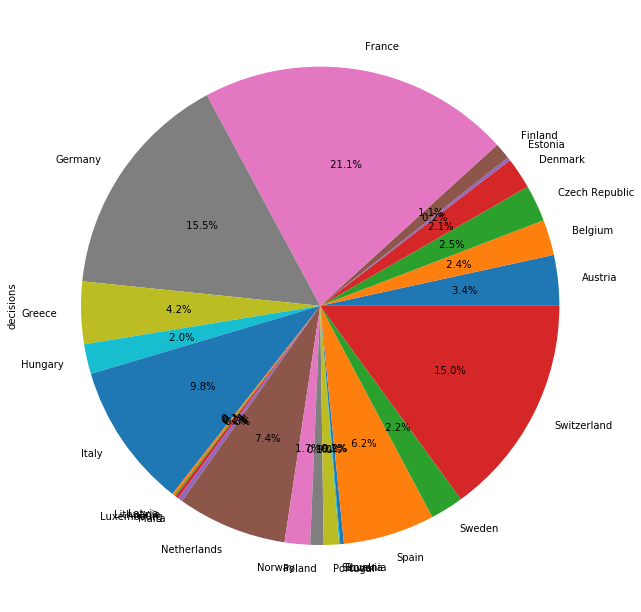

In [406]:
dfn= df[(df['country_consulate']== 'INDIA')]
ndf= dfn['decisions'].groupby(dfn['sch_state']).sum()
ndf.plot.pie(y='decisions', figsize=(11,11), autopct= ' %.1f%%')

## Rejection Rate:

In [281]:

India= df[(df['country_consulate'] == 'INDIA')]
India

,sch_state,country_consulate,Consulate,Visas_applied,Total_univisasIssued,MEV_issued,Share_MEV_issued,Total_LTV_issued,Uni_Visas_notissued,Uniform_Notissued_rate,Total_ATV_Visas_Applied,Total_ATV_Visas_Issued,Total_ATV_Visas_notIssued,NotIssued_rate,decisions,rejection_rate,Weighted_Score
20,Austria,INDIA,NEW DELHI,36820,34792,34812,100.1%,26,2002,5.4%,"36,820",34818,2002,5.4%,36820.0,0.054373,0.020990
93,Belgium,INDIA,MUMBAI,19162,18360,15892,86.6%,0,551,2.9%,"19,162",18360,551,2.9%,18911.0,0.029136,0.018639
94,Belgium,INDIA,NEW DELHI,7117,6052,4029,66.6%,0,888,12.5%,"7,117",6052,888,12.5%,6940.0,0.127954,0.012863
177,Czech Republic,INDIA,NEW DELHI,26683,20449,2035,10.0%,0,6219,23.3%,"26,683",20449,6219,23.3%,26668.0,0.233201,0.001664
253,Denmark,INDIA,NEW DELHI,23275,21890,18884,86.3%,1,949,4.1%,"23,275",21891,949,4.1%,22840.0,0.041550,0.018337
298,Estonia,INDIA,NEW DELHI,2425,1524,984,64.6%,3,898,37.0%,"2,425",1527,898,37.0%,2425.0,0.370309,0.008998
328,Finland,INDIA,NEW DELHI,11959,11398,7869,69.0%,2,512,4.3%,"11,959",11400,512,4.3%,11912.0,0.042982,0.014631
441,France,INDIA,BANGALORE,45048,42308,4772,11.3%,15,2362,5.2%,"45,069",42342,2363,5.2%,44685.0,0.052859,0.002339
442,France,INDIA,KOLKATA,18810,18120,2286,12.6%,0,617,3.3%,"18,810",18120,617,3.3%,18737.0,0.032929,0.002668
443,France,INDIA,MUMBAI,69603,60962,9912,16.3%,0,8171,11.7%,"69,646",60997,8179,11.7%,69133.0,0.118192,0.003154


In [283]:
India= df[(df['country_consulate'] == 'INDIA')]
m0= India['rejection_rate']
r1= India['Total_ATV_Visas_notIssued'].astype(float)
r1= r1.sum(axis = 0, skipna = True) 
r1= float(r1)
d1= India['decisions'].astype(float)
d1=d1.sum(axis = 0, skipna = True) 
m= r1/d1


print("Rejection population mean for whole India:", m, '\n')

for index, row in India.iterrows():
    #print(index, row['sch_state'])
    arr=[]

    #Austria = Egypt[(Egypt['sch_state'] == 'Austria')]
    rej= row['Total_ATV_Visas_notIssued']
    acc= row['Total_ATV_Visas_Issued']
    r=int(rej)
    a= int(acc)


    arr= [1]*r
    arr1= [0]*a

    arr.extend(arr1)
    np.random.shuffle(arr)

    arr= np.asarray(arr)
    tset, pval = ttest_1samp(arr, m)
    
    print(row['sch_state'], ": ")


    if (pval < 0.025):
        print("Test statistic is:", tset ," P value:", pval)
        print("We are rejecting Null Hypothesis i.e. There is a difference between chosen consulate and country's rejection rate")
        print('\n ')
    
    else:
        print("Test statistic is:", tset ," P value:", pval)
        print("We are accepting Null Hypothesis i.e. There is no significant difference between chosen consulate and country's rejection rate")
        print('\n')



Rejection population mean for whole India: 0.09385534314353691 

Austria : 
Test statistic is: -33.411262833375375  P value: 3.819937605786367e-241
We are rejecting Null Hypothesis i.e. There is a difference between chosen consulate and country's rejection rate

 
Belgium : 
Test statistic is: -52.91502328042119  P value: 0.0
We are rejecting Null Hypothesis i.e. There is a difference between chosen consulate and country's rejection rate

 
Belgium : 
Test statistic is: 8.503306812343157  P value: 2.2331652563590613e-17
We are rejecting Null Hypothesis i.e. There is a difference between chosen consulate and country's rejection rate

 
Czech Republic : 
Test statistic is: 53.81138243192595  P value: 0.0
We are rejecting Null Hypothesis i.e. There is a difference between chosen consulate and country's rejection rate

 
Denmark : 
Test statistic is: -39.61097366346196  P value: 0.0
We are rejecting Null Hypothesis i.e. There is a difference between chosen consulate and country's rejection

### Report ( Rejected Rate) :
- This is very similar to what we had for Egypt so i am going to explain that along the same lines. 

- Whole Country's rejection rate turned out to be 9%, for only 2 countries( Poland, Portugal)  we accepted the null hypothesis that there is actually no difference between country's rejection rate and the specific consulate's. However, for all the other countries we accepted the alternative hypothesis that there is actually a significant difference between the population mean and sample mean. 

- This explains that since most countries rejected the null hypothesis , we can say that choosing a specific consulate over other actually changes your chances of getting rejected. For example if you randomly choose a country your chances of getting rejected are 9%, however, if you go to Belgiums's consulate you will have a better chance of acceptance since its rejection rate is only 2% , so you improved your chances just by the dataset.

- However we are not taking any other factors into account, we are assuming that all applications are more or less of the same quality so our results might be biased. Other factors we are not taking into account are the geo political factors. For e.g. if the consulate country has good political relationship with our chosen country then there might be better chances or maybe if it is in European Union even then there can be an effect on rejection rate.

- Since India is in Asia there can be other geographical factors included in this as well. 



## Multi- Entry Visa Share

In [399]:
India= df[(df['country_consulate'] == 'INDIA')]
India["Share_MEV_issued"]= India["Share_MEV_issued"].astype(str)
India["Share_MEV_issued"] = India["Share_MEV_issued"].str.replace("%","").astype(float)
m0= India['Share_MEV_issued']

m= sts.mean(m0)
m=m/100

print("Mean population for Multi Entry Visa Share:" , m, '\n')
for index, row in India.iterrows():
    #print(index, row['sch_state'])
    arr=[]

    Mev= row['MEV_issued']
    tot= row['Total_univisasIssued']

    mev= int(Mev)
    t= int(tot)
    t= t- mev

    arr= [1]*mev
    arr1= [0]* t

    arr.extend(arr1)
    np.random.shuffle(arr)

    arr= np.asarray(arr)


    tset, pval = ttest_1samp(arr, m)
    
    
    print(row['sch_state'], ": ")


    if (pval < 0.025):
        print("Test statistic is:", tset ," P value:", pval)
        print("We are rejecting Null Hypothesis i.e. There is a difference between chosen consulate and country's MEV share visas")
        print('\n ')
    
    else:
        print("Test statistic is:", tset ," P value:", pval)
        print("We are accepting Null Hypothesis i.e. There is no significant difference between chosen consulate and country's MEV share visas")
        print('\n')





C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Mean population for Multi Entry Visa Share: 0.5943488372093023 

Austria : 
Test statistic is: inf  P value: 0.0
We are rejecting Null Hypothesis i.e. There is a difference between chosen consulate and country's MEV share visas

 
Belgium : 
Test statistic is: 107.73843477221912  P value: 0.0
We are rejecting Null Hypothesis i.e. There is a difference between chosen consulate and country's MEV share visas

 
Belgium : 
Test statistic is: 11.770680997604158  P value: 1.22096279378767e-31
We are rejecting Null Hypothesis i.e. There is a difference between chosen consulate and country's MEV share visas

 
Czech Republic : 
Test statistic is: -236.37407588432296  P value: 0.0
We are rejecting Null Hypothesis i.e. There is a difference between chosen consulate and country's MEV share visas

 
Denmark : 
Test statistic is: 115.34095156976738  P value: 0.0
We are rejecting Null Hypothesis i.e. There is a difference between chosen consulate and country's MEV share visas

 
Estonia : 
Test stat

## Report (Multi Entry Visa Share):
- We will again explain it along the same lines as Egypt. 

- MEV share is basically the ratio of MEV uniform visas issued and total uniform visas including MEV. MEV are type of uniform visas also. So these results are beneficial if you are interested in getting MEV visa so you can choose a consulate where there are more share of MEVs issued. 

- Whole Country's MEV share turned out to be 0.594 i.e. if you randomly go to any consulate then there MEV share of all uniform visas issued are almost 58.4%. We applied the test and all countries rejected the null hypothesis.

- So we can conclude using this that since most countries rejected the null hypothesis , we can say that choosing a specific consulate over other actually changes your chances of getting different MEV share than the population mean. We can go to a specific consulate with higher MEV share and get better chances of getting more MEV share.

- However we are not taking any other factors into account,e.g. some consulates may have a history or speciality of issuing more MEVS than other uniform visas. Other factors include again the application levels. we are assuming that all applications are more or less of the same quality so our results might be biased. Other factors we are not taking into account are the geo political factors. For e.g. if the consulate country has good political relationship with our chosen country then there might be better chances of MEV issued or maybe if it is in European Union even then there can be an effect on rejection rate.



-

## Weighted Score

In [393]:









Japan= df[(df['country_consulate'] == 'INDIA')]
Japan["Visas_applied"] = Japan["Total_ATV_Visas_Applied"].str.replace(",","").astype(float)
mf = Japan["Share_MEV_issued"].str.replace("%","").astype(float)

Japan['Weighted_Score']= (1- (Japan['rejection_rate']))* (mf/100)

weight= Japan[['Weighted_Score']]

min_max_scaler = preprocessing.MinMaxScaler()


x_scaled = min_max_scaler.fit_transform(weight)

Japan['Weighted_Score']= x_scaled
Japan['Weighted_Score']= Japan['Weighted_Score'].astype(str)
Japan['Weighted_Score']= Japan['Weighted_Score'].str.replace("nan","0").astype(float)
m0= Japan['Weighted_Score']

m= sts.mean(m0)
print("Mean Population for weighted score is :" , m, '\n')



for index, row in Japan.iterrows():
    #print(index, row['sch_state'])
    arr=[]
    
    
    total= row['Visas_applied']
    total= int(total)
    wt= row['Weighted_Score']
    wt= int(wt*total)
    total= total- wt

    arr= [1]*wt
    arr1= [0]*total

    arr.extend(arr1)
    np.random.shuffle(arr)

    arr= np.asarray(arr)

   
    tset, pval = ttest_1samp(arr, m)
    
    
    print(row['sch_state'], ": ")


    if (pval < 0.025):
        print("Test statistic is:", tset ," P value:", pval)
        print("We are rejecting Null Hypothesis i.e. There is a difference between chosen consulate and country's weighted score")
        print('\n ')
    
    else:
        print("Test statistic is:", tset ," P value:", pval)
        print("We are accepting Null Hypothesis i.e. There is no significant difference between chosen consulate and country's weighted score")
        print('\n')







C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#in

Mean Population for weighted score is : 0.5553293251191708 

Austria : 
Test statistic is: inf  P value: 0.0
We are rejecting Null Hypothesis i.e. There is a difference between chosen consulate and country's weighted score

 
Belgium : 
Test statistic is: 144.9796283270392  P value: 0.0
We are rejecting Null Hypothesis i.e. There is a difference between chosen consulate and country's weighted score

 
Belgium : 
Test statistic is: 9.3215605440487  P value: 1.5004852322017137e-20
We are rejecting Null Hypothesis i.e. There is a difference between chosen consulate and country's weighted score

 
Czech Republic : 
Test statistic is: -308.78740647992674  P value: 0.0
We are rejecting Null Hypothesis i.e. There is a difference between chosen consulate and country's weighted score

 
Denmark : 
Test statistic is: 144.9756573661249  P value: 0.0
We are rejecting Null Hypothesis i.e. There is a difference between chosen consulate and country's weighted score

 
Estonia : 
Test statistic is: -1

## Report( Weighted Score)
- Weighted Score calculated is basically the acceptance rate of uniform visa and when we multiply that with the MEV share , we get the term that people who get their uniform visa accepted and what share of them are MEVs. We normalized the data for specific country and then applied t test. No hypothesis was accepted, . As we can see all consulates have different values than the population mean which is 0.555. 

- Thus we can reject the hypothesis that the weighted score of specific consulate is similar to whole country's weighted score. we can also conclude that going to a specific consulate can change our chances of getting accepted and having better share of MEVs. Consulates who have generally a higher weighted score will have better chances for that thus visa shopping is justified here. 

- Other factors may influence this score which were discussed in the previous explanations as well.

# JAPAN

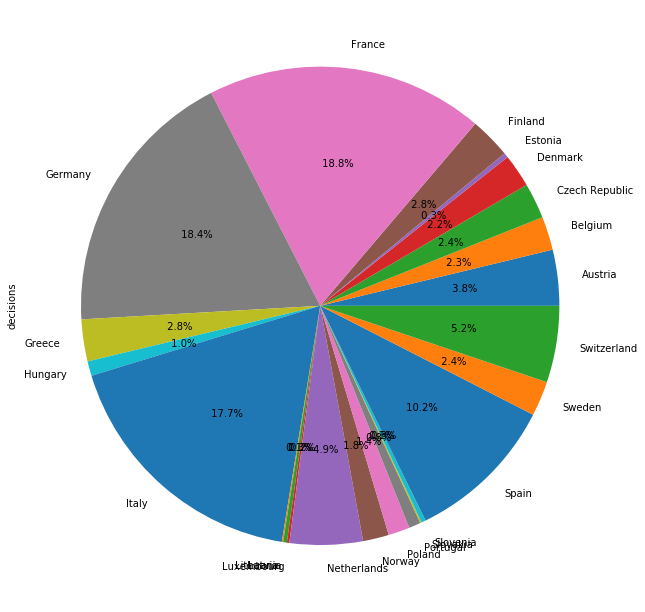

In [407]:
dfn= df[(df['country_consulate']== 'JAPAN')]
ndf= dfn['decisions'].groupby(dfn['sch_state']).sum()
ndf.plot.pie(y='decisions', figsize=(11,11), autopct= ' %.1f%%')

## Rejection Rate:

In [394]:

Japan= df[(df['country_consulate'] == 'JAPAN')]
Japan = Japan.fillna(0)
Japan

,sch_state,country_consulate,Consulate,Visas_applied,Total_univisasIssued,MEV_issued,Share_MEV_issued,Total_LTV_issued,Uni_Visas_notissued,Uniform_Notissued_rate,Total_ATV_Visas_Applied,Total_ATV_Visas_Issued,Total_ATV_Visas_notIssued,NotIssued_rate,decisions,rejection_rate,Weighted_Score
25,Austria,JAPAN,TOKYO,543,543,38,7.0%,0,0,0,543,543,0,0,543.0,0.000000,0.001516
102,Belgium,JAPAN,TOKYO,338,311,183,58.8%,0,15,4.4%,338,311,15,4.4%,326.0,0.046012,0.012423
184,Czech Republic,JAPAN,TOKYO,345,345,31,9.0%,0,0,0,345,345,0,0,345.0,0.000000,0.001960
259,Denmark,JAPAN,TOKYO,321,321,27,8.4%,0,2,0.6%,321,321,2,0.6%,323.0,0.006192,0.001815
301,Estonia,JAPAN,TOKYO,46,45,16,35.6%,0,1,2.2%,46,45,1,2.2%,46.0,0.021739,0.007698
334,Finland,JAPAN,TOKYO,401,373,61,16.4%,14,12,3.0%,402,388,12,3.0%,399.0,0.030075,0.003495
455,France,JAPAN,TOKYO,2753,2592,682,26.3%,2,107,3.9%,"2,753",2594,107,3.9%,2701.0,0.039615,0.005572
612,Germany,JAPAN,OSAKA,828,811,507,62.5%,2,15,1.8%,828,813,15,1.8%,828.0,0.018116,0.013594
613,Germany,JAPAN,TOKYO,1816,1814,1810,99.8%,2,0,0,"1,816",1816,0,0,1816.0,0.000000,0.022132
753,Greece,JAPAN,TOKYO,408,398,171,43.0%,0,10,2.5%,408,398,10,2.5%,408.0,0.024510,0.009280


In [395]:
India= df[(df['country_consulate'] == 'JAPAN')]
m0= India['rejection_rate']
r1= India['Total_ATV_Visas_notIssued'].astype(float)
r1= r1.sum(axis = 0, skipna = True) 
r1= float(r1)
d1= India['decisions'].astype(float)
d1=d1.sum(axis = 0, skipna = True) 
m= r1/d1


print("Rejection population mean for whole India:", m, '\n')

for index, row in India.iterrows():
    #print(index, row['sch_state'])
    arr=[]

    #Austria = Egypt[(Egypt['sch_state'] == 'Austria')]
    rej= row['Total_ATV_Visas_notIssued']
    acc= row['Total_ATV_Visas_Issued']
    r=int(rej)
    a= int(acc)


    arr= [1]*r
    arr1= [0]*a

    arr.extend(arr1)
    np.random.shuffle(arr)

    arr= np.asarray(arr)
    tset, pval = ttest_1samp(arr, m)
    
    print(row['sch_state'], ": ")


    if (pval < 0.025):
        print("Test statistic is:", tset ," P value:", pval)
        print("We are rejecting Null Hypothesis i.e. There is a difference between chosen consulate and country's rejection rate")
        print('\n ')
    
    else:
        print("Test statistic is:", tset ," P value:", pval)
        print("We are accepting Null Hypothesis i.e. There is no significant difference between chosen consulate and country's rejection rate")
        print('\n')



Rejection population mean for whole India: 0.023412532999861055 

Austria : 
Test statistic is: -inf  P value: 0.0
We are rejecting Null Hypothesis i.e. There is a difference between chosen consulate and country's rejection rate

 
Belgium : 
Test statistic is: 1.9446293692223564  P value: 0.05268199873247783
We are accepting Null Hypothesis i.e. There is no significant difference between chosen consulate and country's rejection rate


Czech Republic : 
Test statistic is: -inf  P value: 0.0
We are rejecting Null Hypothesis i.e. There is a difference between chosen consulate and country's rejection rate

 
Denmark : 
Test statistic is: -3.939224957243323  P value: 0.00010026207517454954
We are rejecting Null Hypothesis i.e. There is a difference between chosen consulate and country's rejection rate

 
Estonia : 
Test statistic is: -0.07697651799360858  P value: 0.938983464545027
We are accepting Null Hypothesis i.e. There is no significant difference between chosen consulate and country

### Report ( Rejected Rate) :
- This is very similar to what we had for Egypt and India so i am going to explain that along the same lines. 

- Whole Country's rejection rate turned out to be 2%, in this case alot of countries accepted the null hypothesis.(Belgium, Estonia, Finland, Germany, Greecem Lithuania, luxembourg,  Norway, Poland, Portugal, Slovenia, Sweden, Switzerland.

- This explains that since most countries accepted the null hypothesis , we can say that choosing a specific consulate over other actually has not a significant difference over the other. The population mean is very similar to that of alot of consulates and for the rest of the consulates that rejected null hypothesis we can assume that could be because of other factors such as better application , or the same geo political factors discussed previously.




## MEV Share:

In [396]:
India= df[(df['country_consulate'] == 'JAPAN')]
India["Share_MEV_issued"]= India["Share_MEV_issued"].astype(str)
India["Share_MEV_issued"] = India["Share_MEV_issued"].str.replace("%","").astype(float)
m0= India['Share_MEV_issued']

m= sts.mean(m0)
m=m/100

print("Mean population for Multi Entry Visa Share:" , m, '\n')
for index, row in India.iterrows():
    #print(index, row['sch_state'])
    arr=[]

    Mev= row['MEV_issued']
    tot= row['Total_univisasIssued']

    mev= int(Mev)
    t= int(tot)
    t= t- mev

    arr= [1]*mev
    arr1= [0]* t

    arr.extend(arr1)
    np.random.shuffle(arr)

    arr= np.asarray(arr)


    tset, pval = ttest_1samp(arr, m)
    
    
    print(row['sch_state'], ": ")


    if (pval < 0.025):
        print("Test statistic is:", tset ," P value:", pval)
        print("We are rejecting Null Hypothesis i.e. There is a difference between chosen consulate and country's MEV share visas")
        print('\n ')
    
    else:
        print("Test statistic is:", tset ," P value:", pval)
        print("We are accepting Null Hypothesis i.e. There is no significant difference between chosen consulate and country's MEV share visas")
        print('\n')





Mean population for Multi Entry Visa Share: 0.38667999999999997 

Austria : 
Test statistic is: -28.90066773229981  P value: 7.660989983783721e-112
We are rejecting Null Hypothesis i.e. There is a difference between chosen consulate and country's MEV share visas

 
Belgium : 
Test statistic is: 7.217923503015382  P value: 4.09187249122538e-12
We are rejecting Null Hypothesis i.e. There is a difference between chosen consulate and country's MEV share visas

 
Czech Republic : 
Test statistic is: -19.250987670218983  P value: 1.4585640512677431e-56
We are rejecting Null Hypothesis i.e. There is a difference between chosen consulate and country's MEV share visas

 
Denmark : 
Test statistic is: -19.500567676440536  P value: 2.300303034295738e-56
We are rejecting Null Hypothesis i.e. There is a difference between chosen consulate and country's MEV share visas

 
Estonia : 
Test statistic is: -0.4313019979646226  P value: 0.6683546839972678
We are accepting Null Hypothesis i.e. There is no 

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## Report (Multi Entry Visa Share):
- We will again explain it along the same lines as Egypt. 

- MEV share is basically the ratio of MEV uniform visas issued and total uniform visas including MEV. MEV are type of uniform visas also. So these results are beneficial if you are interested in getting MEV visa so you can choose a consulate where there are more share of MEVs issued. 

- Whole Country's MEV share turned out to be 0.386 i.e. if you randomly go to any consulate then there MEV share of all uniform visas issued are almost 38.6%. We applied the test and all countries rejected the null hypothesis except for 4 countries( Slovenia, Slovakia, Greece, Estonia)

- So we can conclude using this that since most countries rejected the null hypothesis , we can say that choosing a specific consulate over other actually changes your chances of getting different MEV share than the population mean. We can go to a specific consulate with higher MEV share and get better chances of getting more MEV share.

- However we are not taking any other factors into account,e.g. some consulates may have a history or speciality of issuing more MEVS than other uniform visas. Other factors include again the application levels. we are assuming that all applications are more or less of the same quality so our results might be biased. Other factors we are not taking into account are the geo political factors. For e.g. if the consulate country has good political relationship with our chosen country then there might be better chances of MEV issued or maybe if it is in European Union even then there can be an effect on rejection rate.



-

## Weighted Score

In [400]:









Japan= df[(df['country_consulate'] == 'JAPAN')]
Japan["Visas_applied"] = Japan["Total_ATV_Visas_Applied"].str.replace(",","").astype(float)
mf = Japan["Share_MEV_issued"].str.replace("%","").astype(float)

Japan['Weighted_Score']= (1- (Japan['rejection_rate']))* (mf/100)

weight= Japan[['Weighted_Score']]

min_max_scaler = preprocessing.MinMaxScaler()


x_scaled = min_max_scaler.fit_transform(weight)

Japan['Weighted_Score']= x_scaled
Japan['Weighted_Score']= Japan['Weighted_Score'].astype(str)
Japan['Weighted_Score']= Japan['Weighted_Score'].str.replace("nan","0").astype(float)
m0= Japan['Weighted_Score']

m= sts.mean(m0)
print("Mean Population for weighted score is :" , m, '\n')



for index, row in Japan.iterrows():
    #print(index, row['sch_state'])
    arr=[]
    
    
    total= row['Visas_applied']
    total= int(total)
    wt= row['Weighted_Score']
    wt= int(wt*total)
    total= total- wt

    arr= [1]*wt
    arr1= [0]*total

    arr.extend(arr1)
    np.random.shuffle(arr)

    arr= np.asarray(arr)

   
    tset, pval = ttest_1samp(arr, m)
    
    
    print(row['sch_state'], ": ")


    if (pval < 0.025):
        print("Test statistic is:", tset ," P value:", pval)
        print("We are rejecting Null Hypothesis i.e. There is a difference between chosen consulate and country's weighted score")
        print('\n ')
    
    else:
        print("Test statistic is:", tset ," P value:", pval)
        print("We are accepting Null Hypothesis i.e. There is no significant difference between chosen consulate and country's weighted score")
        print('\n')







Mean Population for weighted score is : 0.37439633258944627 

Austria : 
Test statistic is: -29.383983922424832  P value: 3.1513944955510834e-114
We are rejecting Null Hypothesis i.e. There is a difference between chosen consulate and country's weighted score

 
Belgium : 
Test statistic is: 6.7180128792572384  P value: 7.858035624988034e-11
We are rejecting Null Hypothesis i.e. There is a difference between chosen consulate and country's weighted score

 
Czech Republic : 
Test statistic is: -19.407080075604657  P value: 3.420901021550855e-57
We are rejecting Null Hypothesis i.e. There is a difference between chosen consulate and country's weighted score

 
Denmark : 
Test statistic is: -19.79294459752878  P value: 1.6910156200690438e-57
We are rejecting Null Hypothesis i.e. There is a difference between chosen consulate and country's weighted score

 
Estonia : 
Test statistic is: -0.6913039535099416  P value: 0.4929257036839336
We are accepting Null Hypothesis i.e. There is no signi

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#in

## Report( Weighted Score)
- Weighted Score calculated is basically the acceptance rate of uniform visa and when we multiply that with the MEV share , we get the term that people who get their uniform visa accepted and what share of them are MEVs. We normalized the data for specific country and then applied t test. only few accepted the null hypothesis ( Estonia, Greece, Hungray, Slovakia, Slovenia) , rest all rejected the null hypothesis. 

- Thus we can reject the hypothesis that the weighted score of specific consulate is similar to whole country's weighted score. we can also conclude that going to a specific consulate can change our chances of getting accepted and having better share of MEVs. Consulates who have generally a higher weighted score will have better chances for that thus visa shopping is justified here. 

- Other factors may influence this score which were discussed in the previous explanations as well.